In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from collections import Counter
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [5]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 KB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 24.

In [6]:
import dataprep
from dataprep.eda import plot, plot_correlation, plot_missing, create_report

In [7]:
from google.colab import files
upload=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [8]:
data=pd.read_csv('SalaryData_Train.csv')

In [9]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
from google.colab import files
upload=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [11]:
data1=pd.read_csv('SalaryData_Test.csv')

In [12]:
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [13]:
raw_data = data.append(data1)
raw_data.reset_index(inplace=True)
raw_data

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [14]:
print(raw_data.shape)
raw_data.head()

(45221, 15)


,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
raw_data.describe()

,index,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,12565.448575,38.548086,10.118463,1101.454700,88.548617,40.938038
std,8337.871072,13.217981,2.552909,7506.511295,404.838249,12.007640
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,5652.000000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,11305.000000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,18855.000000,47.000000,13.000000,0.000000,0.000000,45.000000
max,30160.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          45221 non-null  int64 
 1   age            45221 non-null  int64 
 2   workclass      45221 non-null  object
 3   education      45221 non-null  object
 4   educationno    45221 non-null  int64 
 5   maritalstatus  45221 non-null  object
 6   occupation     45221 non-null  object
 7   relationship   45221 non-null  object
 8   race           45221 non-null  object
 9   sex            45221 non-null  object
 10  capitalgain    45221 non-null  int64 
 11  capitalloss    45221 non-null  int64 
 12  hoursperweek   45221 non-null  int64 
 13  native         45221 non-null  object
 14  Salary         45221 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [17]:
raw_data.isnull().sum()

index            0
age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
raw_data[raw_data.duplicated()]

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [19]:
raw_data[raw_data.duplicated()].shape

(0, 15)

In [20]:
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
raw_data[numerical_features].head()

Number of numerical variables: 6


,index,age,educationno,capitalgain,capitalloss,hoursperweek
0,0,39,13,2174,0,40
1,1,50,13,0,0,13
2,2,38,9,0,0,40
3,3,53,7,0,0,40
4,4,28,13,0,0,40


In [21]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


In [22]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


In [23]:
categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [24]:
for var in categorical: 
    
    print(raw_data[var].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [25]:
for var in categorical: 
    print(raw_data[var].value_counts()/np.float(len(raw_data)))

 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: education, dtype: float64
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: maritalstatus, dtype: float64
 Craft-repair         0.13312

<ipython-input-25-188f55297ea1>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(raw_data[var].value_counts()/np.float(len(raw_data)))


In [26]:
for var in categorical:
    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [27]:
raw_data.corr()

,index,age,educationno,capitalgain,capitalloss,hoursperweek
index,1.000000,-0.003723,0.000634,-0.001517,-0.002175,-0.002257
age,-0.003723,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.000634,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,-0.001517,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,-0.002175,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,-0.002257,0.101992,0.146206,0.083880,0.054220,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'index'),
  Text(1.5, 0, 'age'),
  Text(2.5, 0, 'educationno'),
  Text(3.5, 0, 'capitalgain'),
  Text(4.5, 0, 'capitalloss'),
  Text(5.5, 0, 'hoursperweek')])

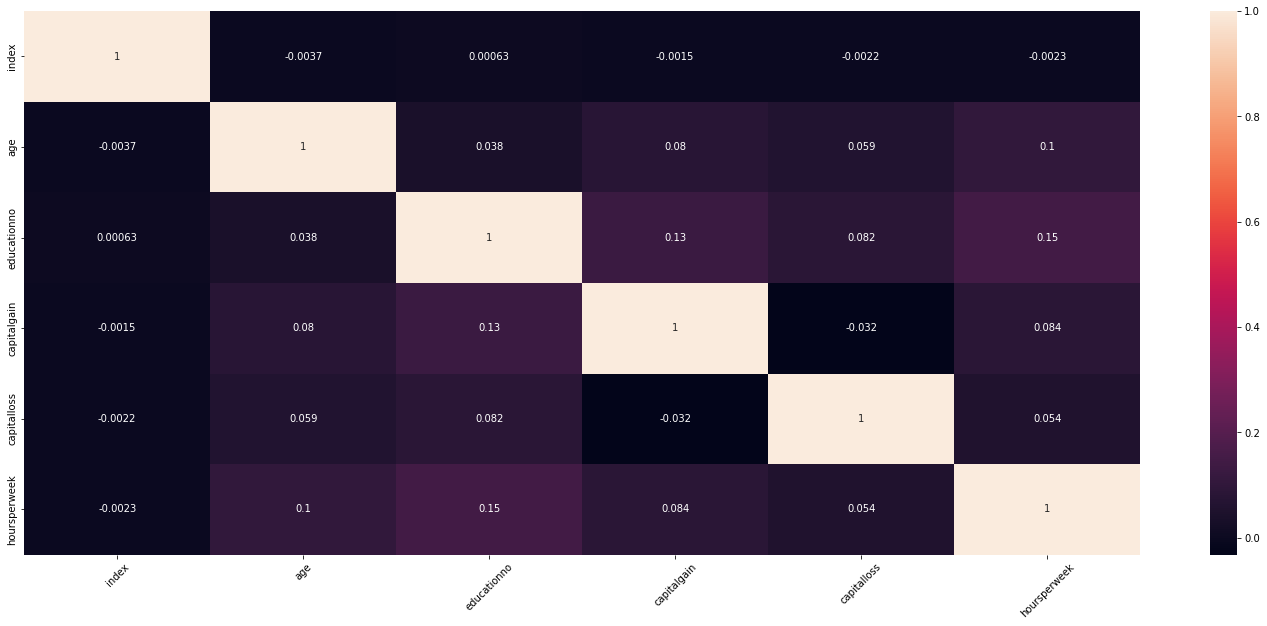

In [28]:
fig= plt.figure(figsize=(25, 10))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


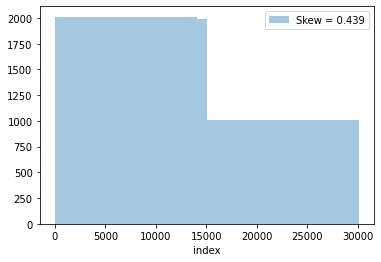

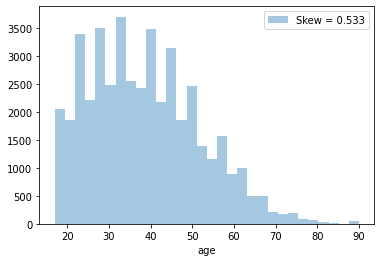

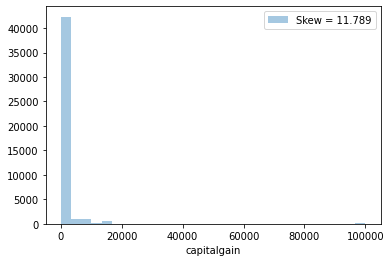

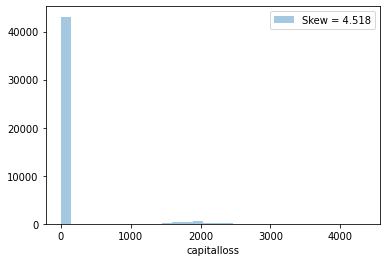

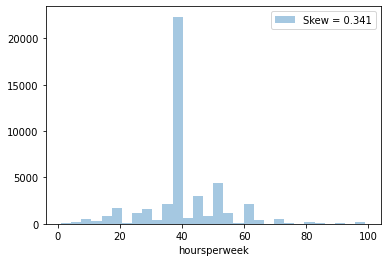

In [29]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [35]:
continuous_feature

['index', 'age', 'capitalgain', 'capitalloss', 'hoursperweek']

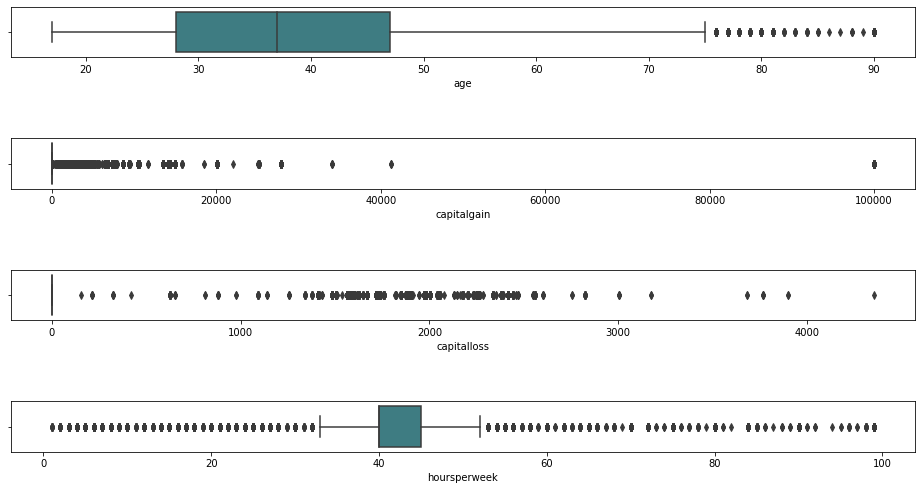

In [36]:
ot=raw_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=5.0)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


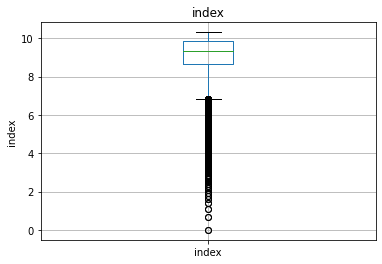

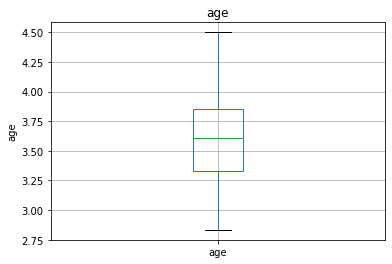

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


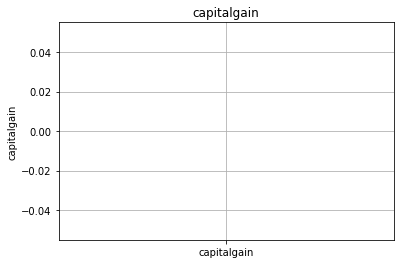

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


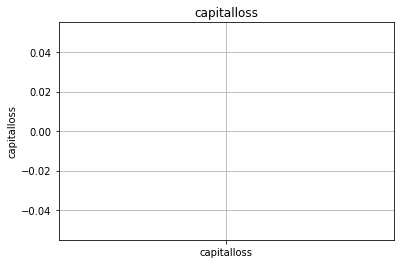

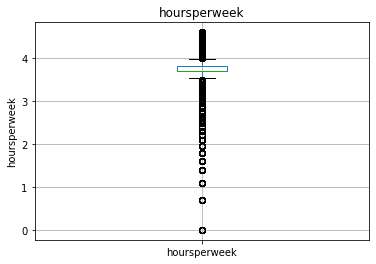

In [37]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

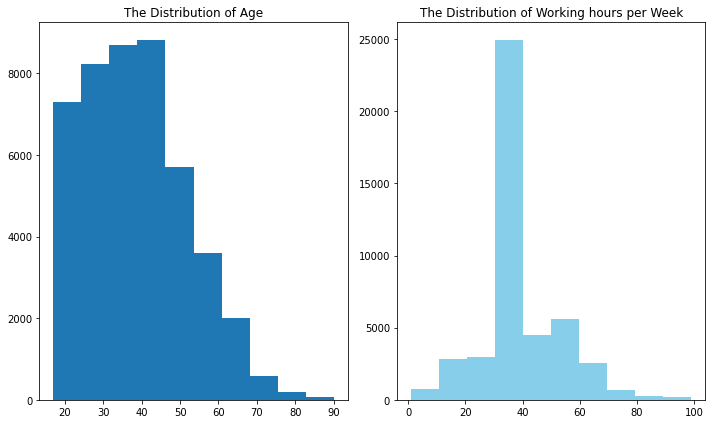

In [38]:
dist_age_balance = plt.figure(figsize = (10,6))
ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)
ra1.hist(raw_data['age'])
ra1.set_title('The Distribution of Age')
ra2.hist(raw_data['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')
plt.tight_layout() 
plt.show()

In [39]:
raw_data[['age','hoursperweek']].describe()

,age,hoursperweek
count,45221.000000,45221.000000
mean,38.548086,40.938038
std,13.217981,12.007640
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


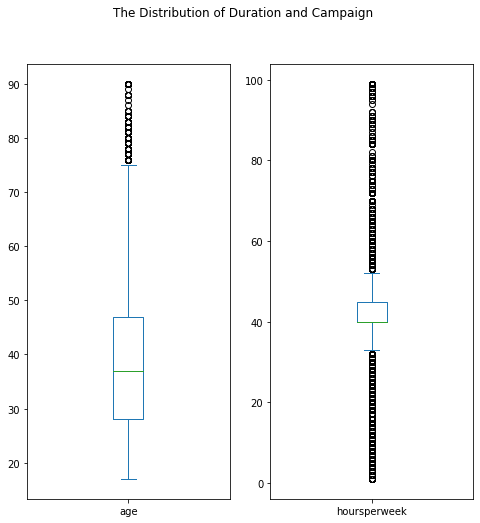

In [40]:
df1 = raw_data.copy()
df1[['age','hoursperweek']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

In [41]:
b_df = pd.DataFrame()
b_df['age_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','age']].describe())['age']
b_df['age_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','age']].describe())['age']

b_df

,age_wrt_salary_more_than_50k,age_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,36.749566,44.006067
std,13.564858,10.340502
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,46.000000,51.000000
max,90.000000,90.000000


<AxesSubplot:title={'center':'Age and Salary statistics'}>

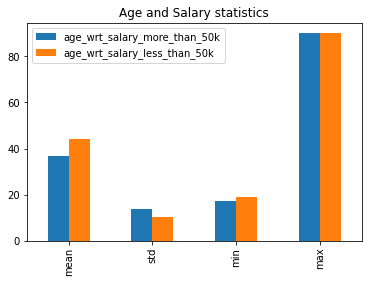

In [42]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Salary statistics')

In [43]:
a_df = pd.DataFrame()
a_df['capitalgain_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalgain']].describe())['capitalgain']
a_df['capitalgain_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalgain']].describe())['capitalgain']

a_df

,capitalgain_wrt_salary_more_than_50k,capitalgain_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,149.027783,3991.791667
std,927.460669,14616.543746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


<AxesSubplot:title={'center':'Capital Gain and Salary statistics'}>

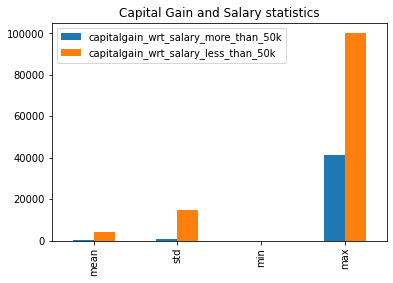

In [44]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Gain and Salary statistics')

In [45]:
c_df = pd.DataFrame()
c_df['capitalloss_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalloss']].describe())['capitalloss']
c_df['capitalloss_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalloss']].describe())['capitalloss']

c_df

,capitalloss_wrt_salary_more_than_50k,capitalloss_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,53.969188,193.487063
std,312.007128,592.642319
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


<AxesSubplot:title={'center':'Capital Loss and Salary statistics'}>

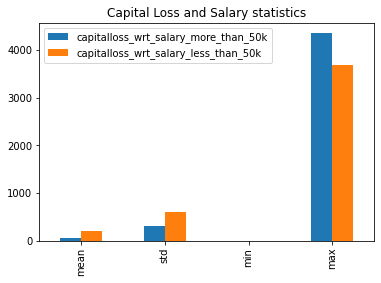

In [46]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Loss and Salary statistics')

In [47]:
p_df = pd.DataFrame()
p_df['hoursperweek_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','hoursperweek']].describe())['hoursperweek']
p_df['hoursperweek_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','hoursperweek']].describe())['hoursperweek']

p_df

,hoursperweek_wrt_salary_more_than_50k,hoursperweek_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,39.372005,45.690489
std,11.974303,10.797764
min,1.000000,1.000000
25%,37.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


<AxesSubplot:title={'center':'Working Hours per Week and Salary statistics'}>

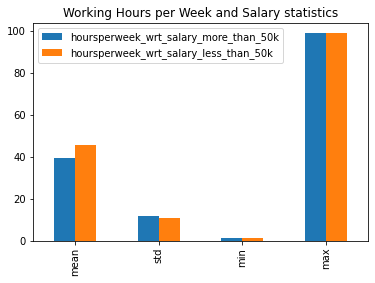

In [48]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Working Hours per Week and Salary statistics')

In [49]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head(10)

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [50]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

7 number of unique categories in feature named workclass
16 number of unique categories in feature named education
7 number of unique categories in feature named maritalstatus
14 number of unique categories in feature named occupation
6 number of unique categories in feature named relationship
5 number of unique categories in feature named race
2 number of unique categories in feature named sex
40 number of unique categories in feature named native
2 number of unique categories in feature named Salary


In [51]:
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'workclass' has 7 unique categories
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

Feature 'education' has 16 unique categories
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

Feature 'maritalstatus' has 7 unique categories
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus,

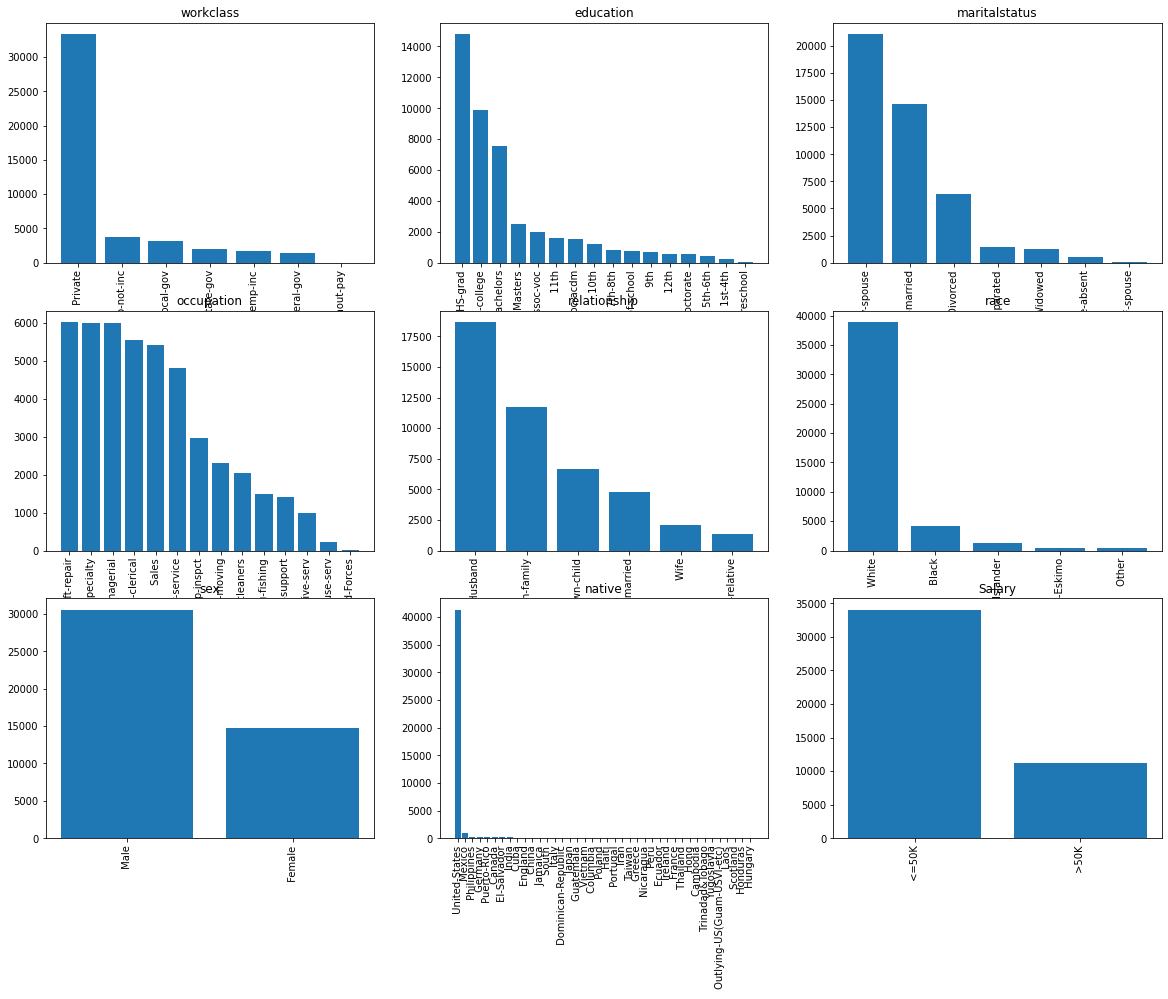

In [52]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical_features:
    value_counts = raw_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()


Text(0.5, 1.0, 'Working Class')

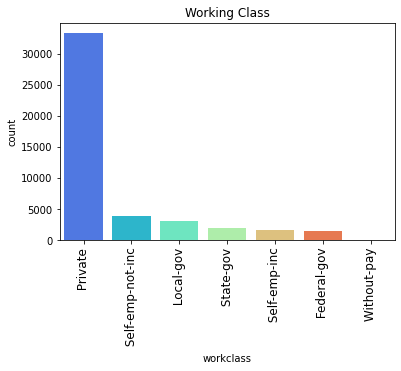

In [53]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=raw_data, palette = pal, 
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

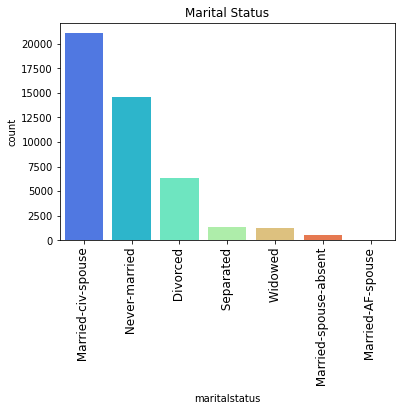

In [54]:
sns.countplot(x='maritalstatus', data=raw_data, palette = pal, 
              order=raw_data['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')


Text(0.5, 1.0, 'Education')

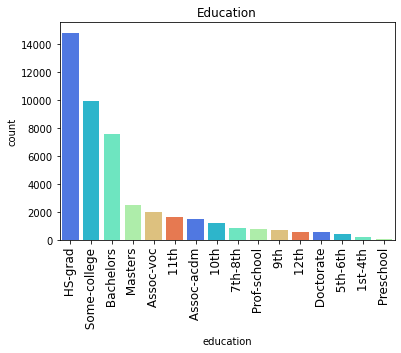

In [55]:
sns.countplot(x='education', data=raw_data, palette = pal, 
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

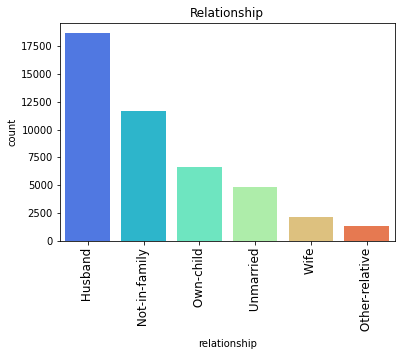

In [56]:
sns.countplot(x='relationship', data=raw_data, palette = pal, 
              order=raw_data['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Sex')

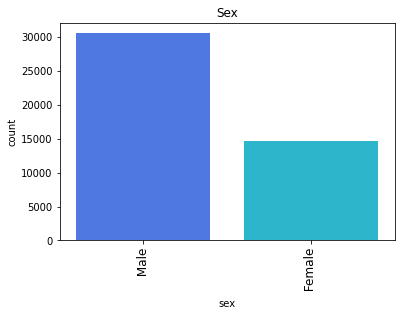

In [58]:
sns.countplot(x='sex', data=raw_data, palette = pal, 
              order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Native')

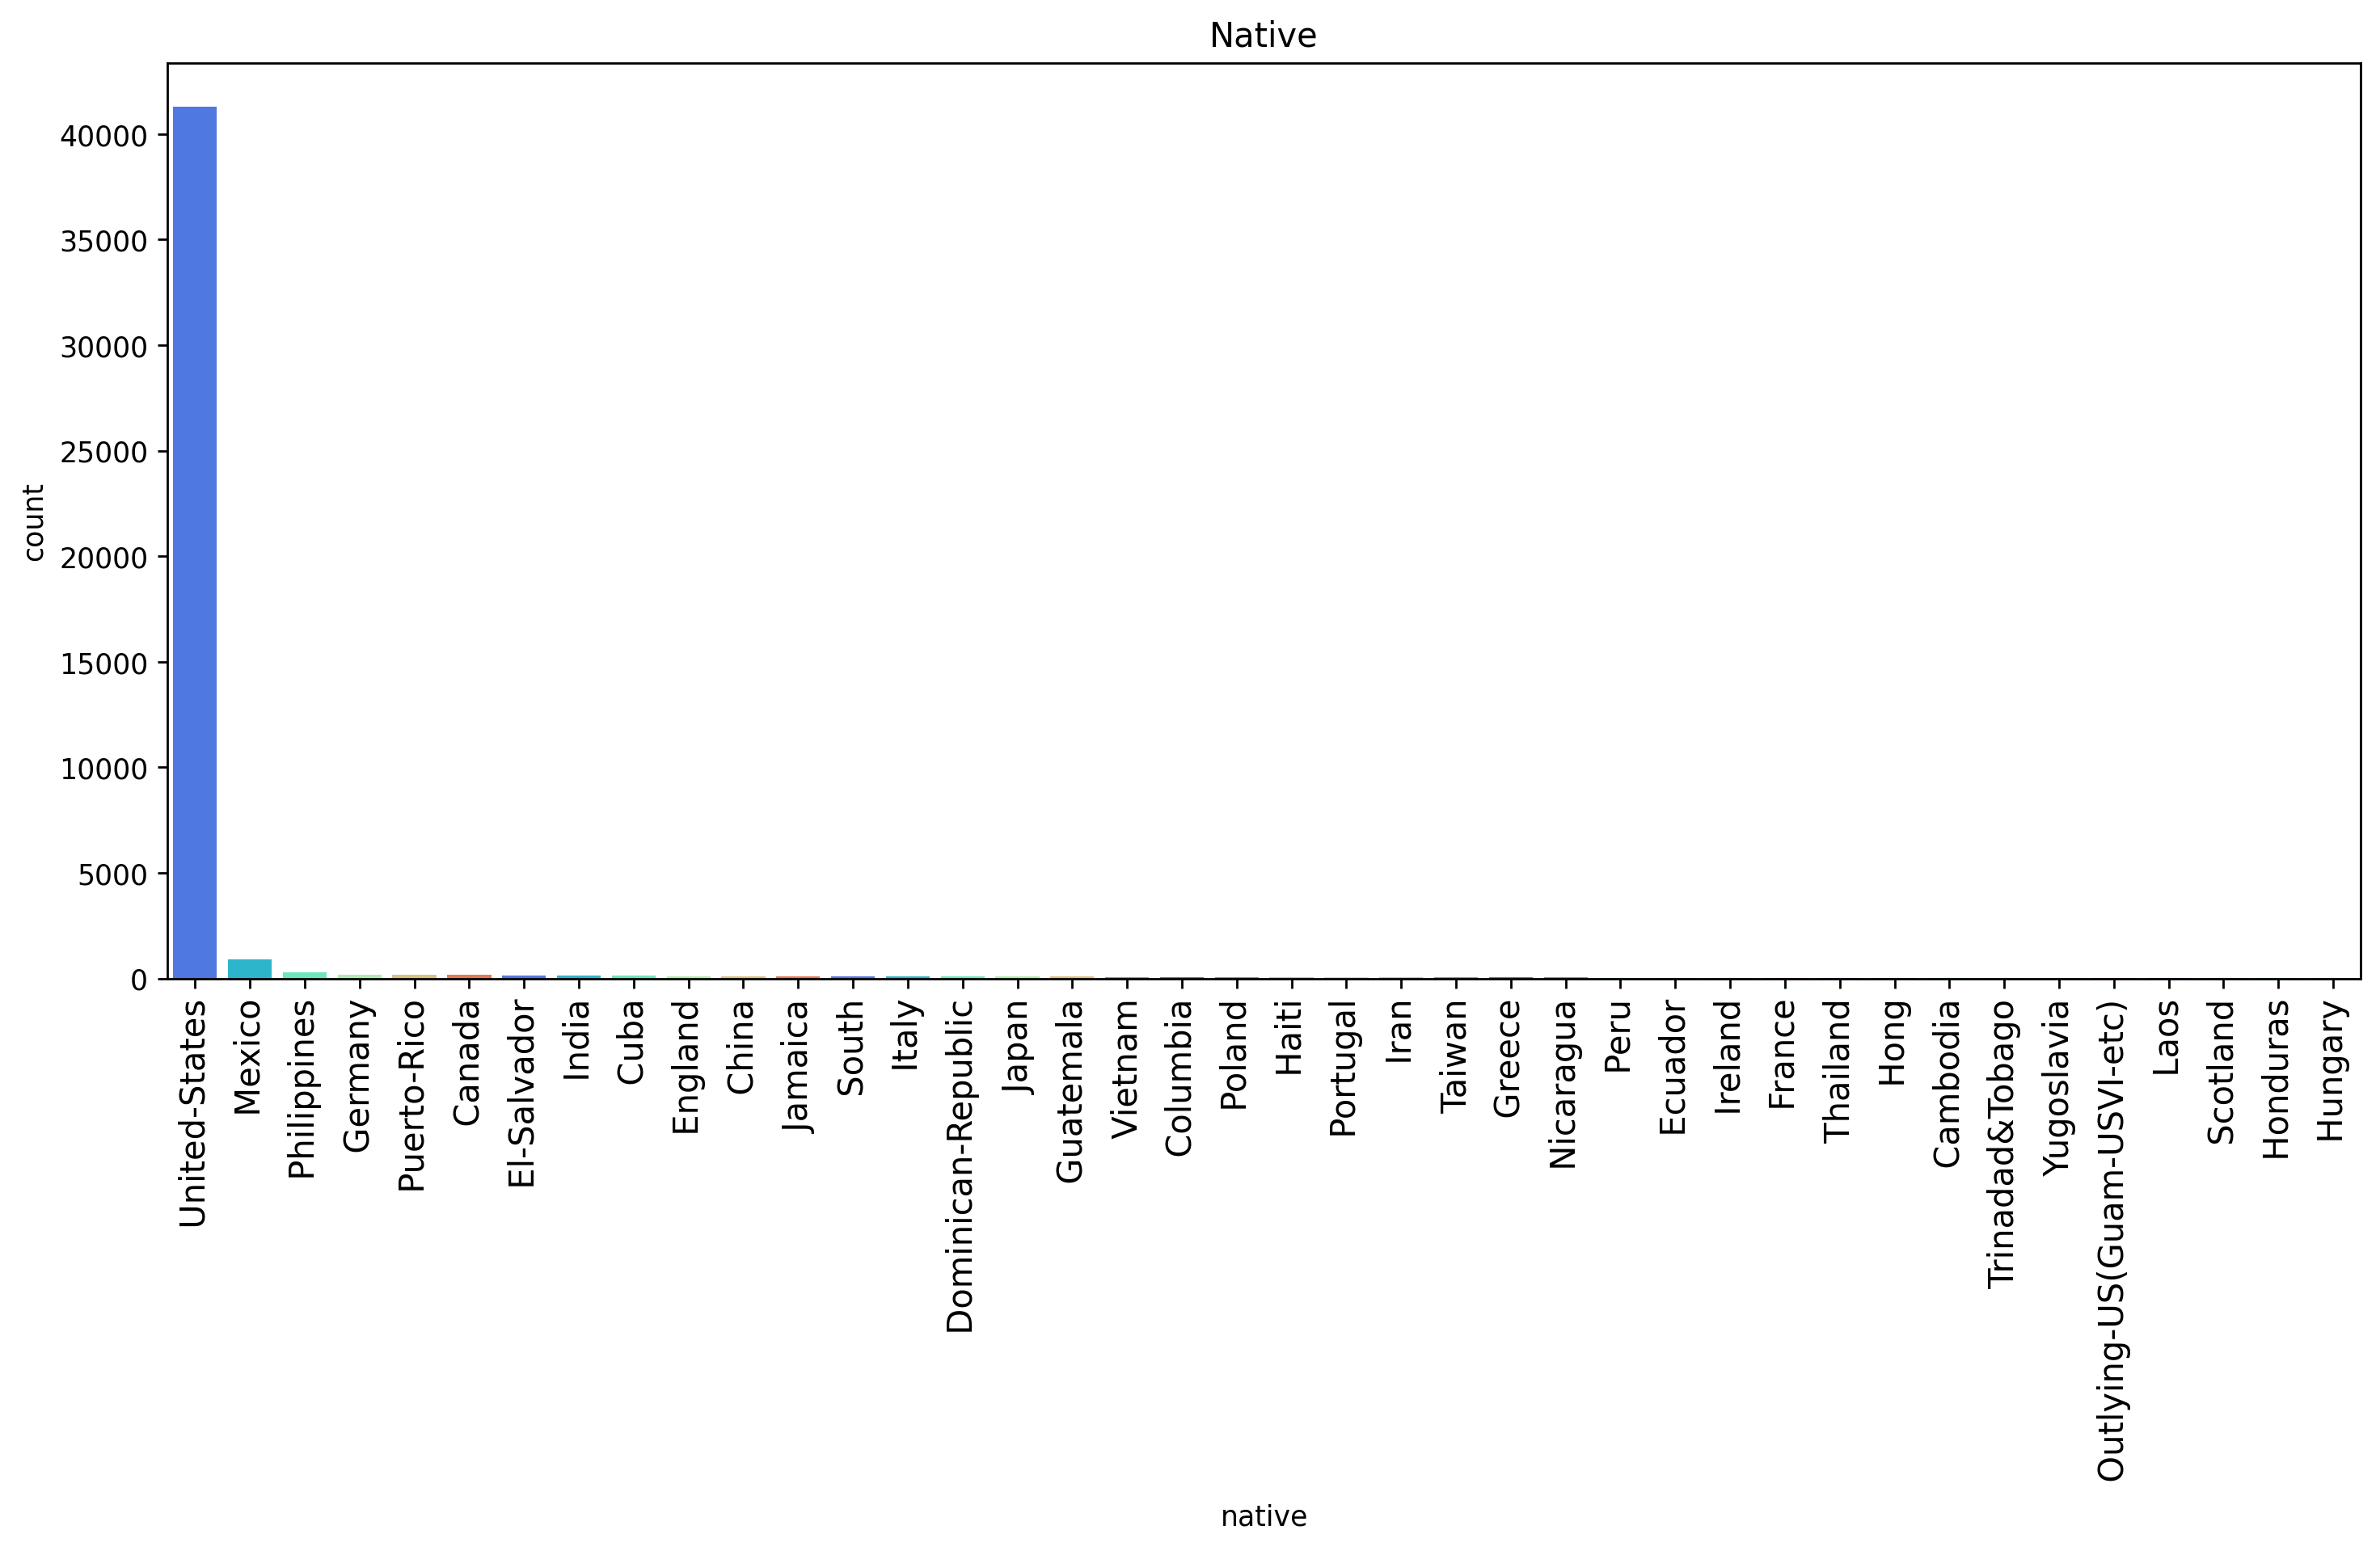

In [59]:
plt.figure(figsize=(14,6),dpi=250)
sns.countplot(x='native', data=raw_data, palette = pal, 
              order=raw_data['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')

In [60]:
countlessthanfiftyk = len(raw_data[raw_data.Salary == ' <=50K'])
countgreatthanfiftyk = len(raw_data[raw_data.Salary == ' >50K'])
print("Percentage of Employees with Salary greater than 50k: {:.2f}%".format((countgreatthanfiftyk / (len(raw_data.Salary))*100)))
print("Percentage of Employees with Salary lesser than 50k: {:.2f}%".format((countlessthanfiftyk / (len(raw_data.Salary))*100)))

Percentage of Employees with Salary greater than 50k: 24.78%
Percentage of Employees with Salary lesser than 50k: 75.22%


In [61]:
raw_data.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

Text(0.5, 1.0, 'Salary')

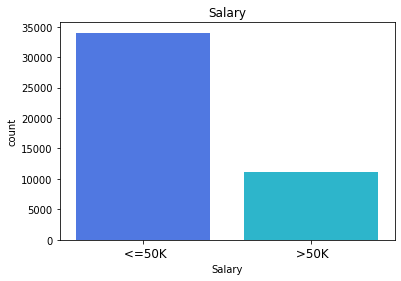

In [62]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Salary', data=raw_data, palette = pal, 
              order=raw_data['Salary'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Salary')

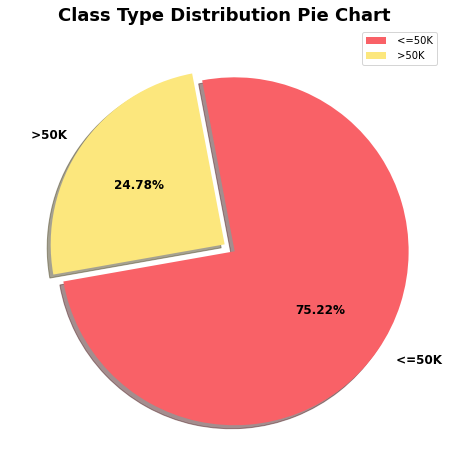

In [63]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['Salary'].value_counts(),
       labels=raw_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

<AxesSubplot:>

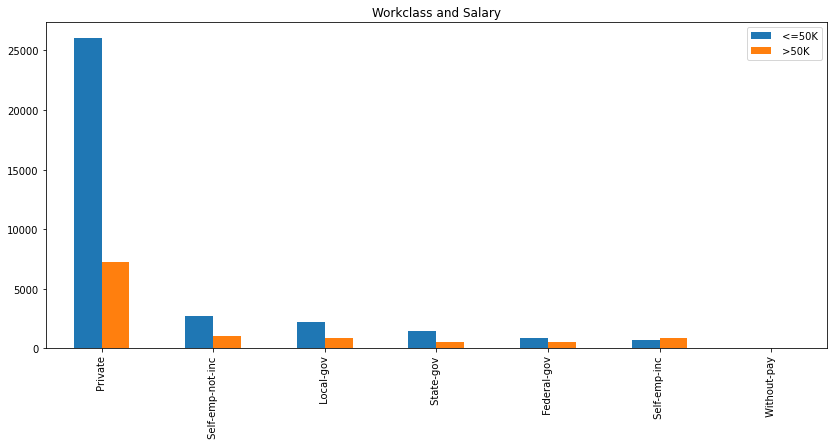

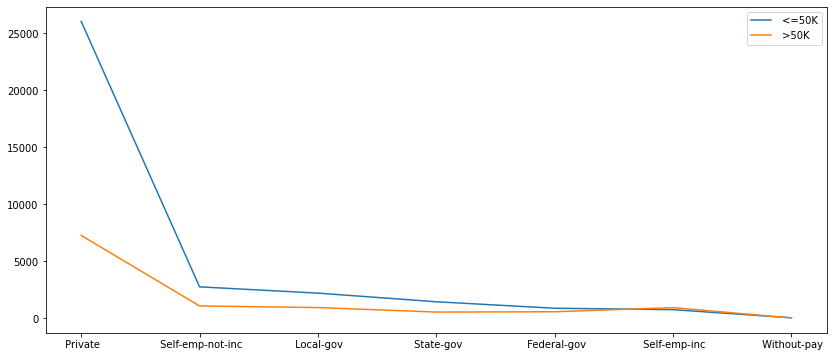

In [64]:
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()
j_df.plot.bar(title = 'Workclass and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='workclass'>

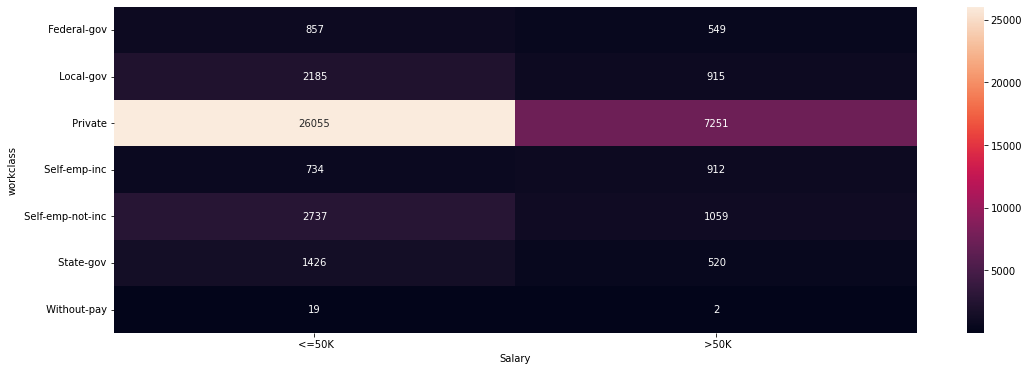

In [67]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['workclass'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

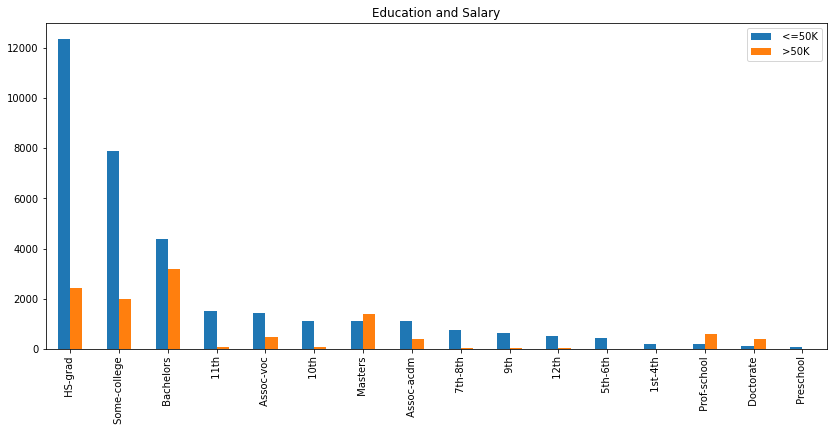

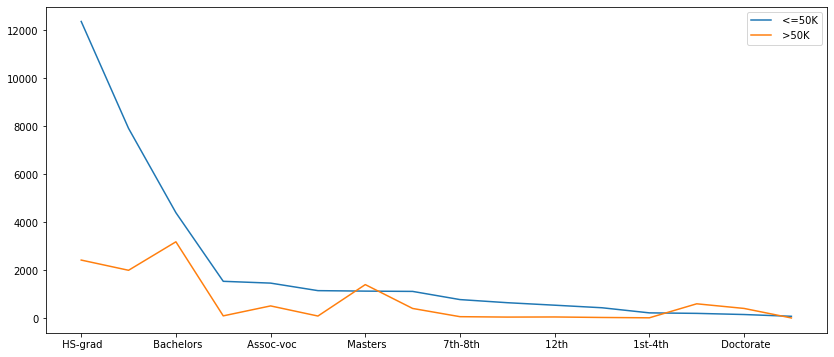

In [68]:
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['education'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['education'].value_counts()
j_df.plot.bar(title = 'Education and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='education'>

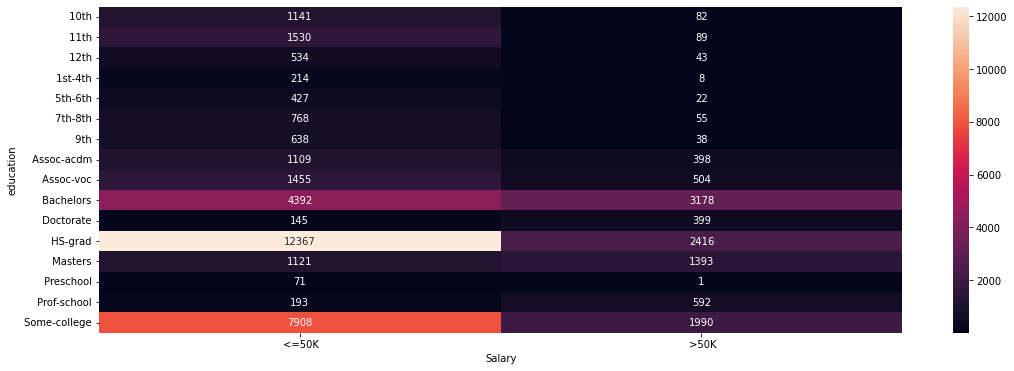

In [69]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

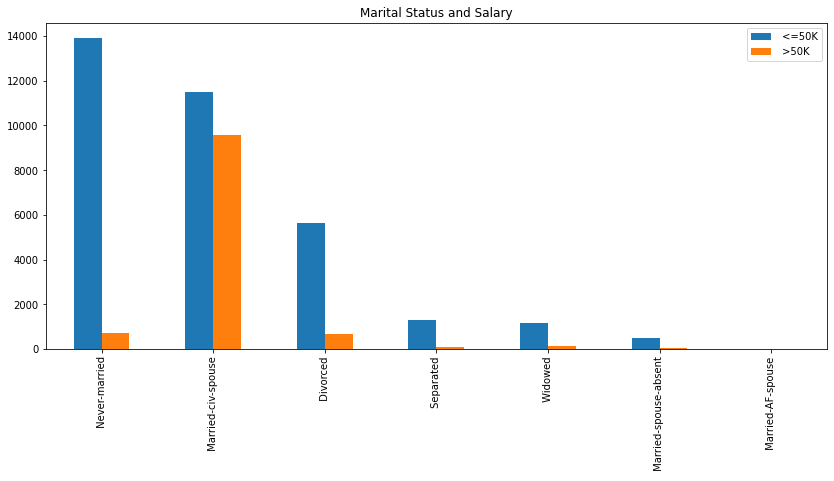

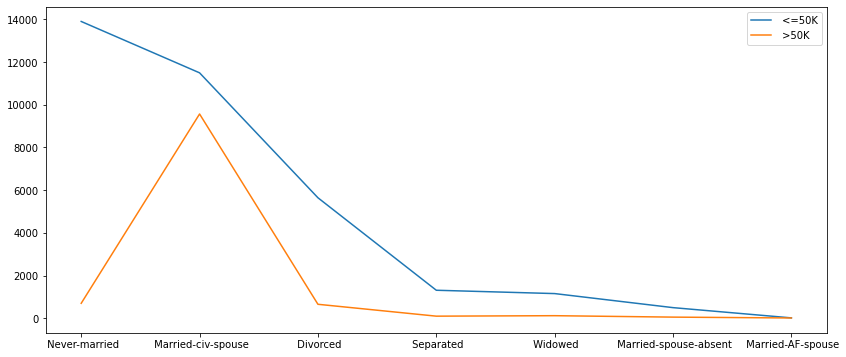

In [72]:
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['maritalstatus'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['maritalstatus'].value_counts()
j_df.plot.bar(title = 'Marital Status and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='maritalstatus'>

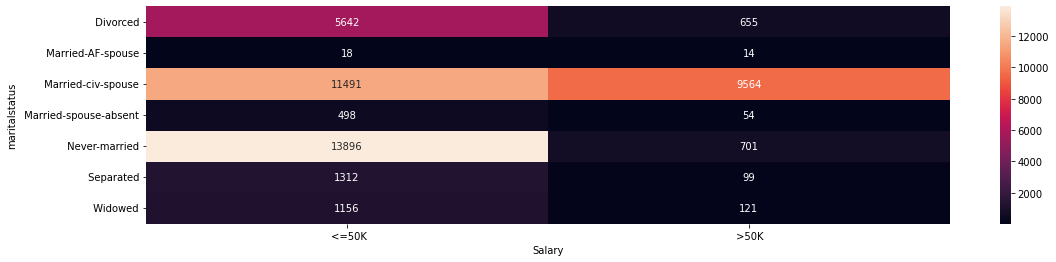

In [73]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['maritalstatus'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

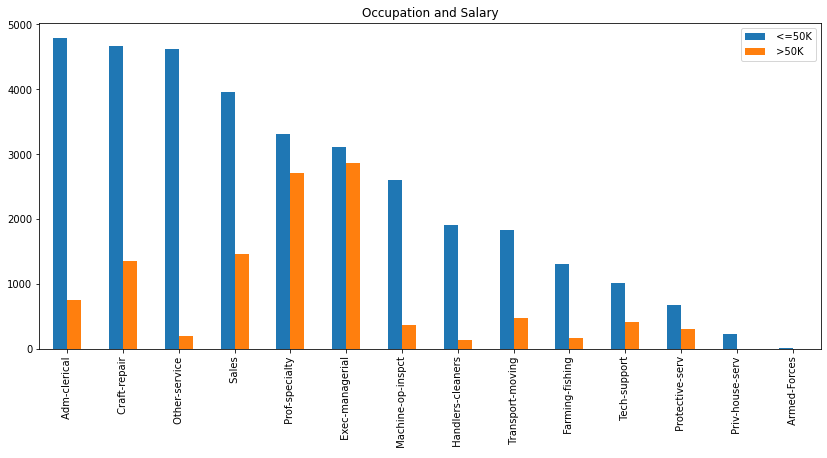

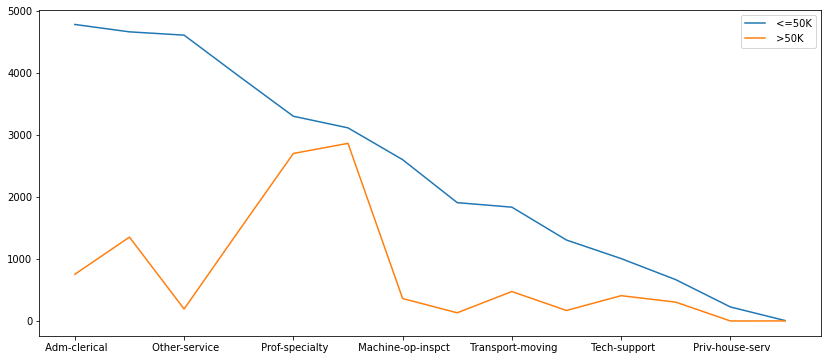

In [74]:
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['occupation'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['occupation'].value_counts()
j_df.plot.bar(title = 'Occupation and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='occupation'>

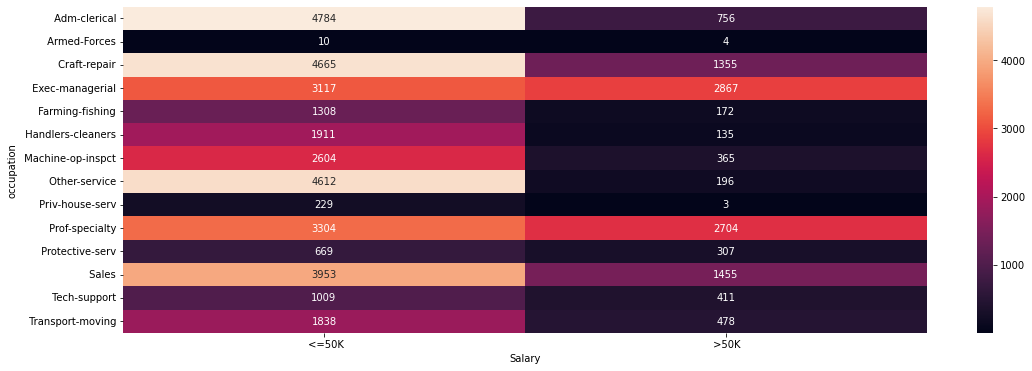

In [75]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['occupation'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

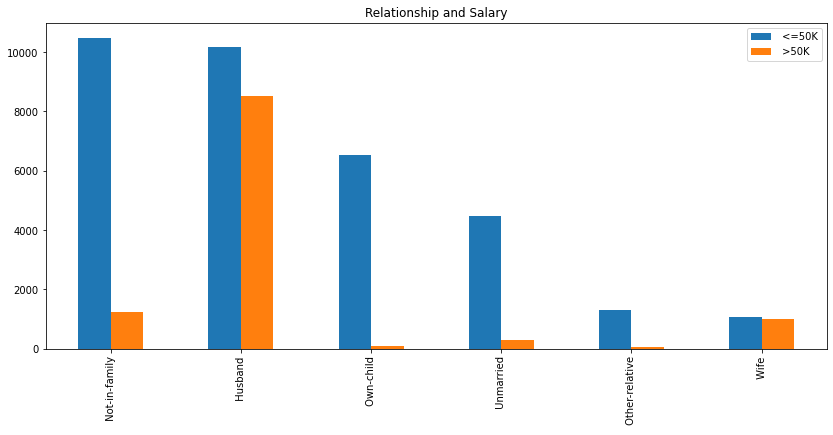

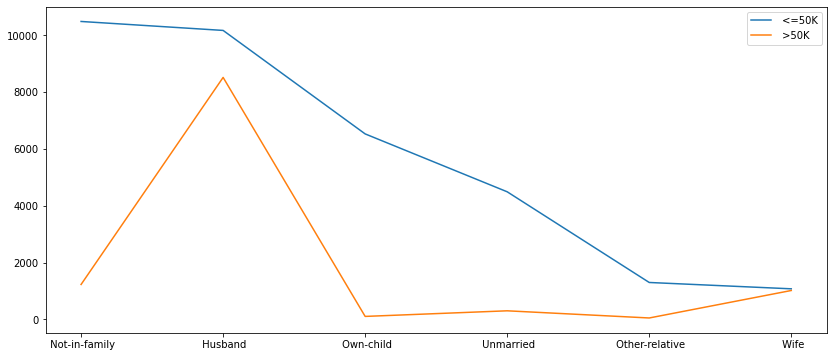

In [76]:
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['relationship'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['relationship'].value_counts()
j_df.plot.bar(title = 'Relationship and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='relationship'>

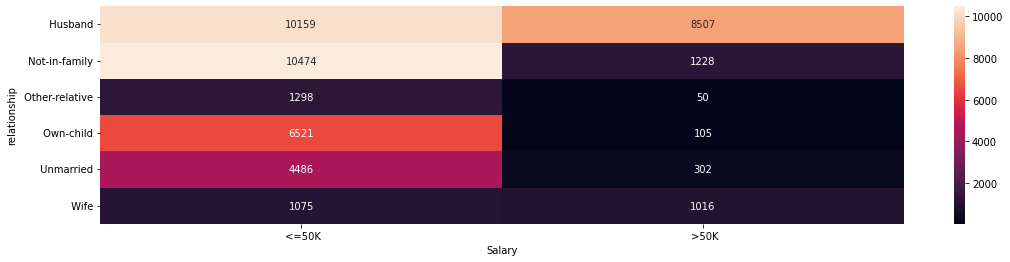

In [78]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['relationship'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

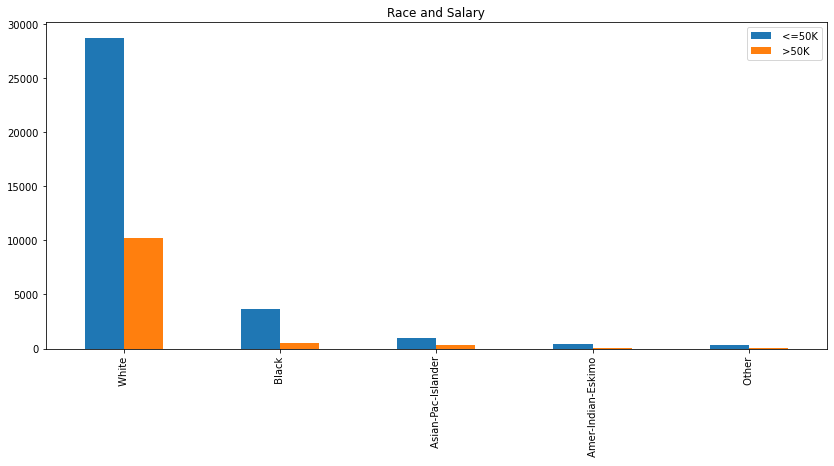

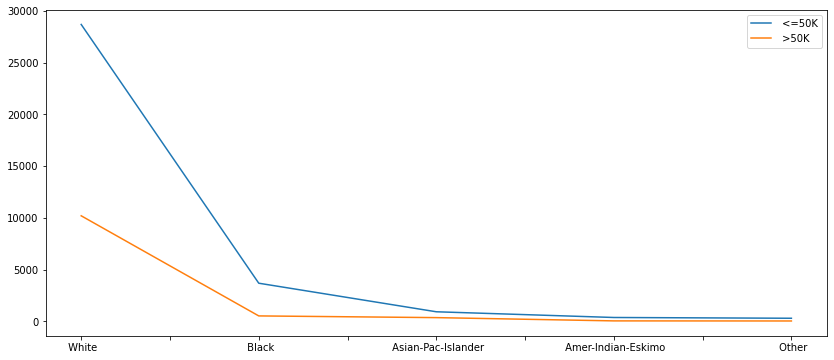

In [79]:
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['race'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['race'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='race'>

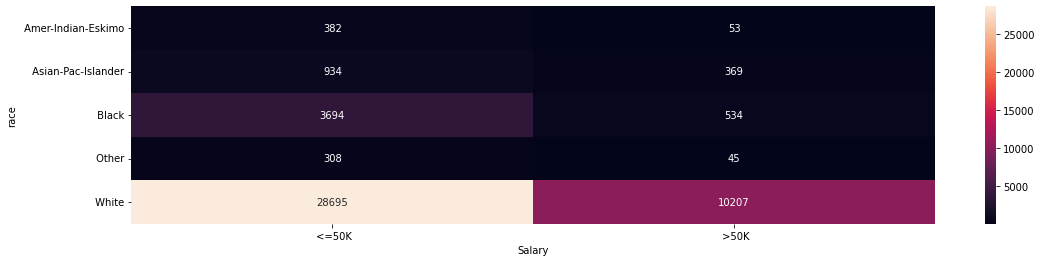

In [80]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['race'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

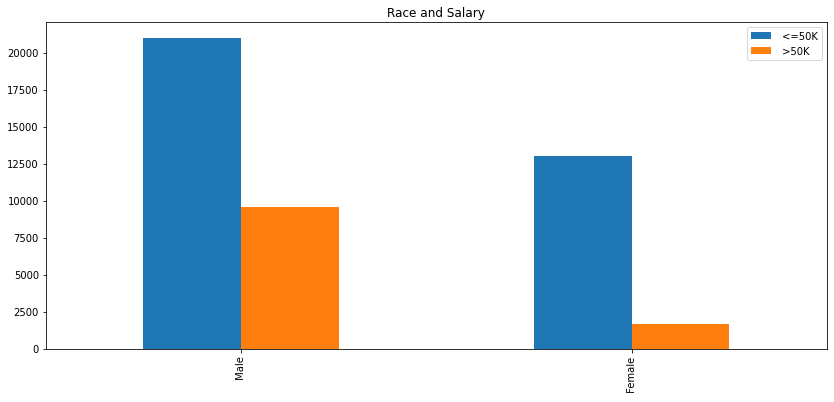

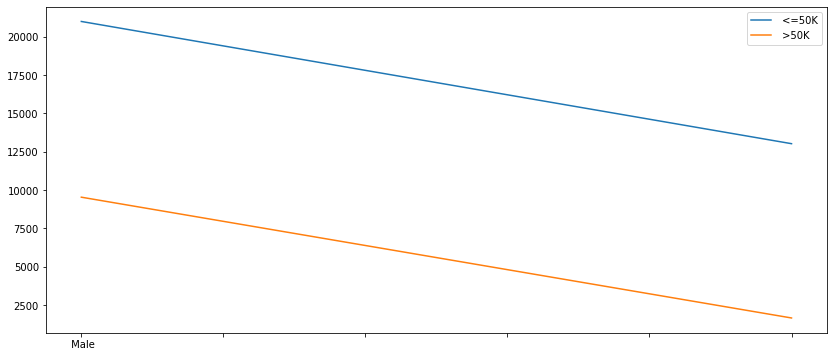

In [81]:
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['sex'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['sex'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='sex'>

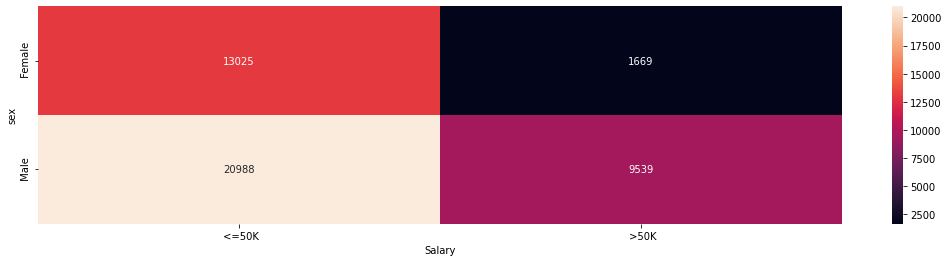

In [82]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['sex'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<AxesSubplot:>

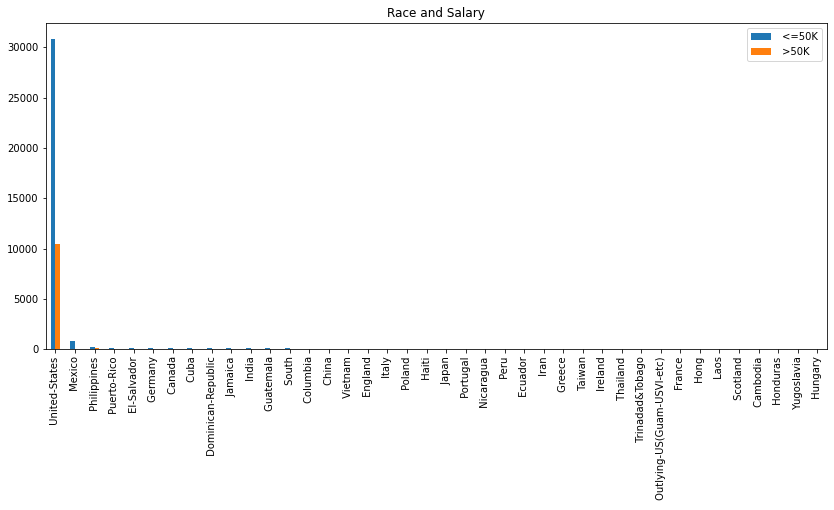

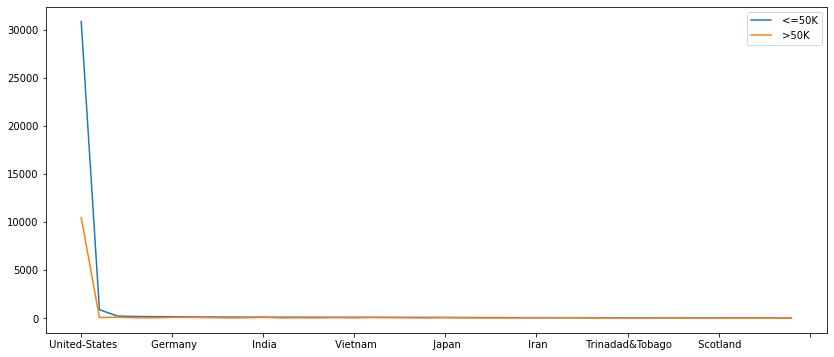

In [83]:
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['native'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['native'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='native'>

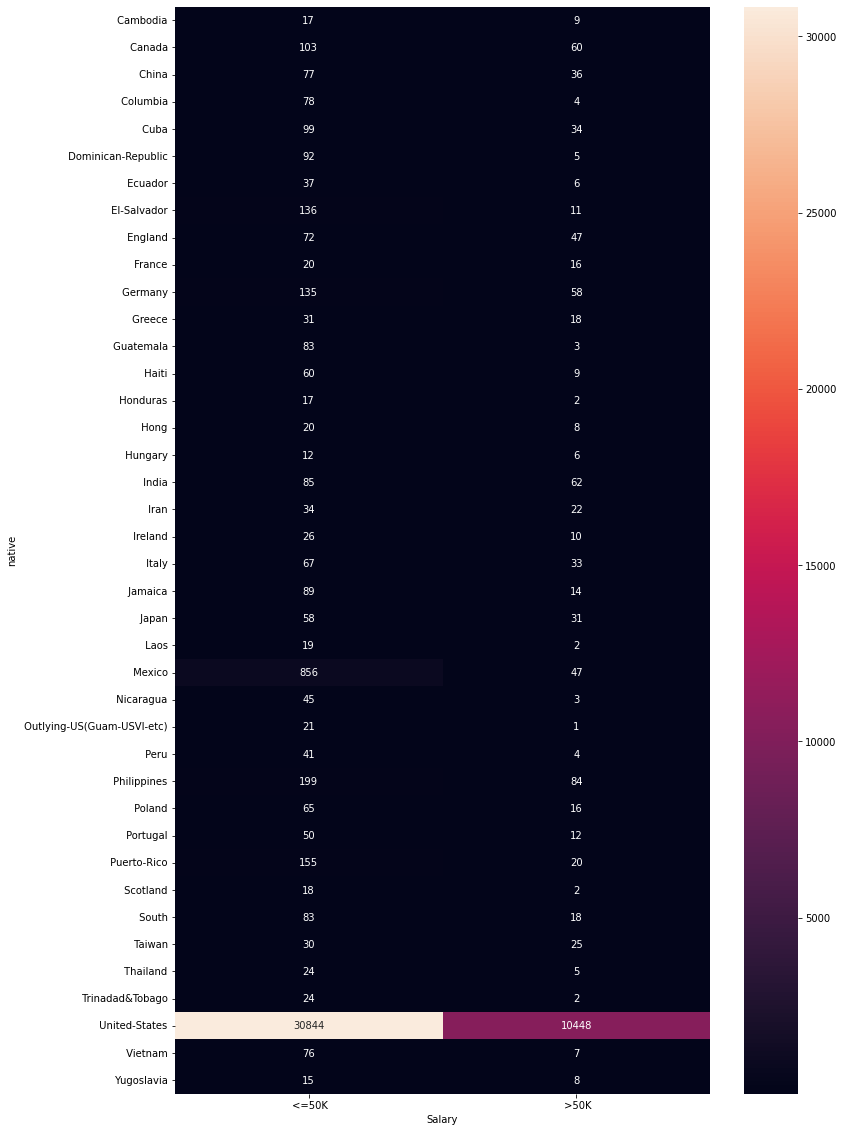

In [85]:
fig= plt.figure(figsize=(12, 20))
sns.heatmap(pd.crosstab(index=raw_data['native'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

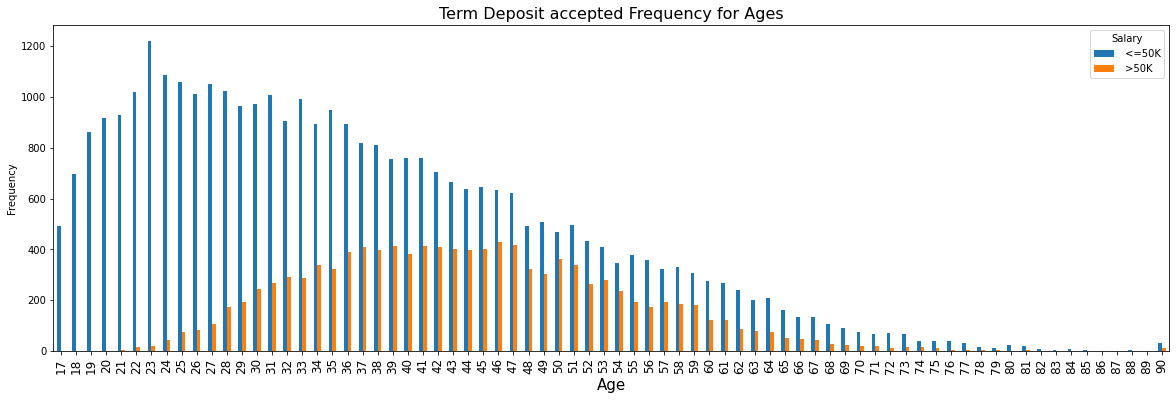

In [86]:
pd.crosstab(raw_data.age,raw_data.Salary).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()


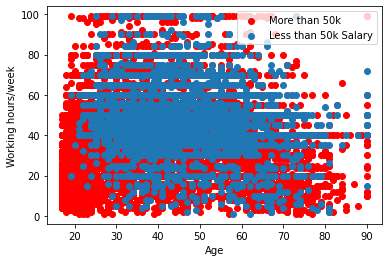

In [87]:
plt.scatter(x=raw_data.age[raw_data.Salary== ' <=50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' <=50K')], c="red")
plt.scatter(x=raw_data.age[raw_data.Salary== ' >50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

In [88]:
raw_data.age.value_counts()

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
88       5
85       5
86       1
89       1
87       1
Name: age, Length: 74, dtype: int64

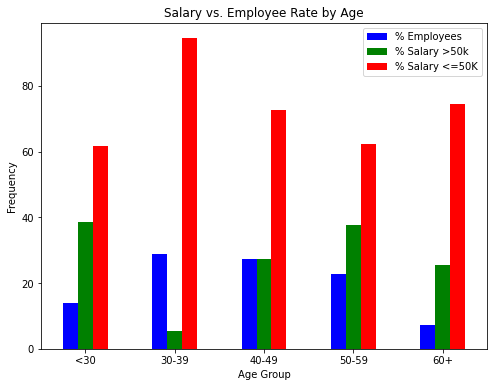

In [89]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age['% Salary <=50K'] = count_age_response_pct[' <=50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
plot_age = age[['% Employees','% Salary >50k','% Salary <=50K']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')
plt.show()

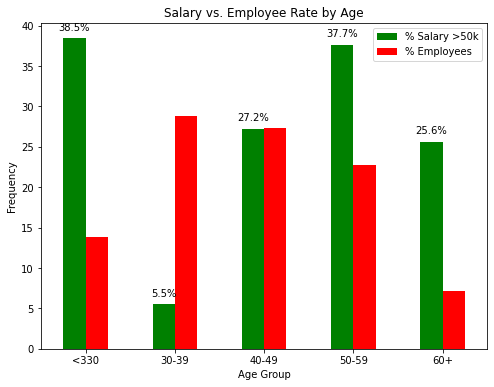

In [90]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<330', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Salary >50k'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [91]:
raw_data.hoursperweek.describe()

count    45221.000000
mean        40.938038
std         12.007640
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

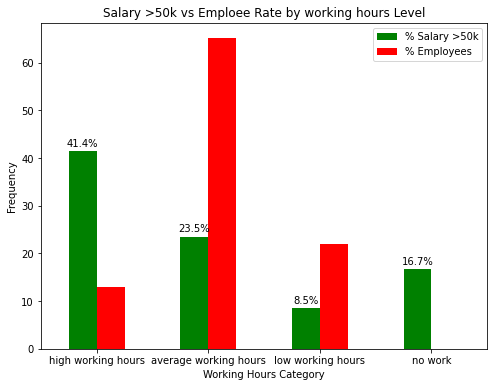

In [92]:
lst = [raw_data]
for column in lst:
    column.loc[column["hoursperweek"] <= 1,  'hour_group'] = 'no work'
    column.loc[(column["hoursperweek"] > 1) & (column["hoursperweek"] <= 35), 'hour_group'] = 'low working hours'
    column.loc[(column["hoursperweek"] > 35) & (column["hoursperweek"] <= 45), 'hour_group'] = 'average working hours'
    column.loc[(column["hoursperweek"] > 50), 'hour_group'] = 'high working hours'
    
count_balance_response_pct = pd.crosstab(raw_data['Salary'],raw_data['hour_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['hour_group'].value_counts())
bal['% Employees'] = bal['hour_group']*100/bal['hour_group'].sum()
bal['% Salary >50k'] = count_balance_response_pct[' >50K']
bal.drop('hour_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Salary >50k vs Emploee Rate by working hours Level')
plt.ylabel('Frequency')
plt.xlabel('Working Hours Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Salary >50k'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [94]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Salary,,,,,,,
<=50K,60.953058,70.483871,78.229148,44.592953,72.102213,73.27852,90.47619
>50K,39.046942,29.516129,21.770852,55.407047,27.897787,26.72148,9.52381


In [95]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
workclass,,
Federal-gov,60.953058,39.046942
Local-gov,70.483871,29.516129
Private,78.229148,21.770852
Self-emp-inc,44.592953,55.407047
Self-emp-not-inc,72.102213,27.897787
State-gov,73.278520,26.721480
Without-pay,90.476190,9.523810


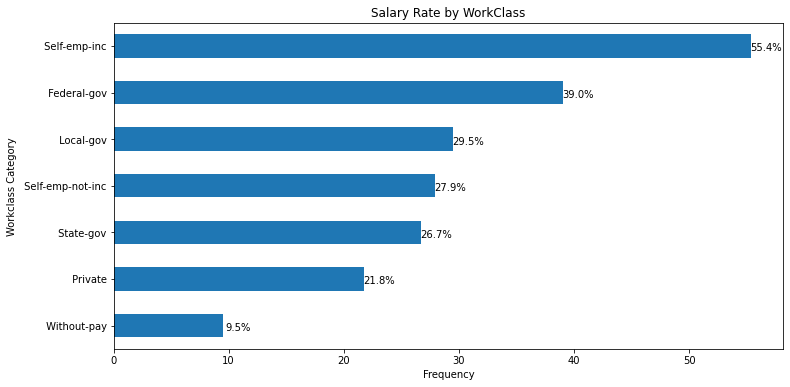

In [96]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Salary Rate by WorkClass')
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [97]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['education']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Salary,,,,,,,,,,,,,,,,
<=50K,93.295176,94.502779,92.54766,96.396396,95.100223,93.317132,94.378698,73.589914,74.272588,58.018494,26.654412,83.656903,44.590294,98.611111,24.585987,79.894928
>50K,6.704824,5.497221,7.45234,3.603604,4.899777,6.682868,5.621302,26.410086,25.727412,41.981506,73.345588,16.343097,55.409706,1.388889,75.414013,20.105072


In [98]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary,<=50K,>50K
education,,
10th,93.295176,6.704824
11th,94.502779,5.497221
12th,92.547660,7.452340
1st-4th,96.396396,3.603604
5th-6th,95.100223,4.899777
7th-8th,93.317132,6.682868
9th,94.378698,5.621302
Assoc-acdm,73.589914,26.410086
Assoc-voc,74.272588,25.727412


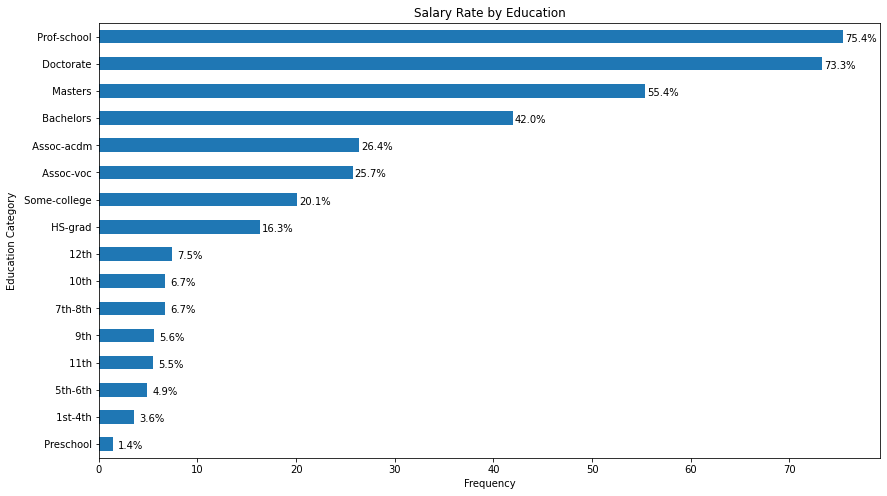

In [99]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,8))
                                                                               
plt.title('Salary Rate by Education')
plt.xlabel('Frequency')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [100]:
raw_data.head()

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group,hour_group
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30.0,average working hours
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50.0,low working hours
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30.0,average working hours
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50.0,average working hours
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20.0,average working hours


In [101]:
data_ = raw_data.copy()
data_.drop('Salary',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:])
data_.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,age_group,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,hour_group_average working hours,hour_group_high working hours,hour_group_low working hours,hour_group_no work
0,0,39,13,2174,0,40,30.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,50,13,0,0,13,50.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,38,9,0,0,40,30.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,3,53,7,0,0,40,50.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,4,28,13,0,0,40,20.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [102]:
data_['Salary'] = raw_data.Salary
data_.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,age_group,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,hour_group_average working hours,hour_group_high working hours,hour_group_low working hours,hour_group_no work,Salary
0,0,39,13,2174,0,40,30.0,0,0,0,...,0,0,1,0,0,1,0,0,0,<=50K
1,1,50,13,0,0,13,50.0,0,0,0,...,0,0,1,0,0,0,0,1,0,<=50K
2,2,38,9,0,0,40,30.0,0,0,1,...,0,0,1,0,0,1,0,0,0,<=50K
3,3,53,7,0,0,40,50.0,0,0,1,...,0,0,1,0,0,1,0,0,0,<=50K
4,4,28,13,0,0,40,20.0,0,0,1,...,0,0,0,0,0,1,0,0,0,<=50K


In [103]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
le.fit(data_["Salary"])
data_["Salary"]=le.transform(data_["Salary"])
data_.head()

,index,age,educationno,capitalgain,capitalloss,hoursperweek,age_group,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,hour_group_average working hours,hour_group_high working hours,hour_group_low working hours,hour_group_no work,Salary
0,0,39,13,2174,0,40,30.0,0,0,0,...,0,0,1,0,0,1,0,0,0,<=50K
1,1,50,13,0,0,13,50.0,0,0,0,...,0,0,1,0,0,0,0,1,0,<=50K
2,2,38,9,0,0,40,30.0,0,0,1,...,0,0,1,0,0,1,0,0,0,<=50K
3,3,53,7,0,0,40,50.0,0,0,1,...,0,0,1,0,0,1,0,0,0,<=50K
4,4,28,13,0,0,40,20.0,0,0,1,...,0,0,0,0,0,1,0,0,0,<=50K


In [104]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df= raw_data.copy()
# Encode labels in column 'species'.
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
#df["Salary"]=label_encoder.fit_transform(df["Salary"])

df.head(10)


,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group,hour_group
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0,30.0,average working hours
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,0,50.0,low working hours
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,0,30.0,average working hours
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,0,50.0,average working hours
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,0,20.0,average working hours
5,5,37,2,12,14,2,3,5,4,0,0,0,40,37,0,30.0,average working hours
6,6,49,2,6,5,3,7,1,2,0,0,0,16,21,0,40.0,low working hours
7,7,52,4,11,9,2,3,0,4,1,0,0,45,37,1,50.0,average working hours
8,8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1,30.0,NaN
9,9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1,40.0,average working hours


In [105]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [106]:
y.unique()

array([0, 1])

In [107]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for train_ix, test_ix in skf.split(x, y):
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 30612, 1: 10087}) Testing Data Counter({0: 3401, 1: 1121})


In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [109]:
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 23809, 1: 7845}) Testing Data Counter({0: 10204, 1: 3363})


In [110]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_test (13567,)


In [111]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [121]:
x = df.drop(['Salary'], axis=1)
y = df['Salary']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [122]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 16)
Shape of X_test:  (13567, 16)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


In [129]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
          
    
    return algo,precision,recall,f1,sampling

In [130]:
model_params = {

    'Gaussian-Naive-Bayes' : {
        'model' : GaussianNB(),
        'params' : {'var_smoothing': np.logspace(0,-9, num=100)}

         
    }
}

In [144]:

y_test.value_counts()

0    10204
1     3363
Name: Salary, dtype: int64

In [145]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')

Mean of 1's 0.24788088744748285 
 Percentage of 1's 25.0 %


In [146]:
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

Mean of 0's 0.7521191125525172 
 Percentage of 0's 75.0 %


In [147]:
y_test.value_counts().head(1) / len(y_test)

0    0.752119
Name: Salary, dtype: float64